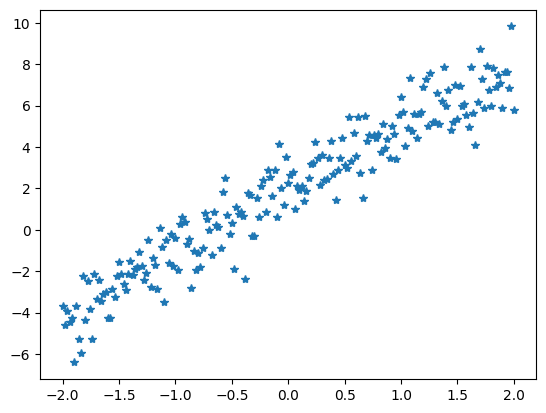

In [46]:
# Aprendendo a tratar dados
import tensorflow as tf
import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
    return x * TRUE_W + TRUE_B

noise = tf.random.normal(shape=[NUM_EXAMPLES])

y = f(x) + noise

plt.plot(x, y, '*')
plt.show()

In [45]:
import tensorflow as tf

def parse_object_to_tensor(obj):
    tensor = []
    for key in obj:
        if type(obj[key]) is dict:
            for dpth_key in obj[key]:
                tensor.append(tf.data.TextLineDataset(obj[key][dpth_key]))
        else:
            tensor.append(tf.data.TextLineDataset(obj[key]))
    return tensor

obj = {"a": "12", "b": {"nm": "13"}, "c": "ajsodjsa"}

a = tf.data.experimental.SqlDataset('bigQuery', 'an', "SELECT * FROM ALL")

print(a)

<_TensorDataset element_spec=DatasetSpec(TensorSpec(shape=(), dtype=tf.string, name=None), TensorShape([3]))>


In [1]:
# Obtendo dados do BiqQuery
from google.cloud import bigquery
import json
import pandas as pd

client = bigquery.Client()

query_job = client.query(
    """
    SELECT * FROM `growyxprod.firebase_projects.post_schema_projectPositions_latest` LIMIT 150
    """
)

result = query_job.result()

tensor = []

for row in result:
    tensor.append(json.loads(row.positions_member))

# print(tensor)

df = pd.json_normalize(tensor)

df['jobTitle'] = df['jobTitle'].fillna(0)
df['skills'] = df['skills'].fillna('[]')
df['skills'] = ','.join(df['skills'][0])
df['softwares'] = ','.join(df['softwares'][0])
df['codeLanguage'] = ','.join(df['codeLanguage'][0])
# df.drop(df[(df['jobTitle'] == 0)].index, inplace=True)
# print(df.head())
candidate = df.pop('database')

df.head()


,codeLanguage,softwares,jobTitle,skills
0,React,,0,"[,]"
1,React,,Project manager,"[,]"
2,React,,UX Designer,"[,]"
3,React,,Developer front-end,"[,]"
4,React,,Developer back-end,"[,]"


In [2]:

selecteds_query_job = client.query(
    """
    SELECT quizPersonality_profile_personal, quizSoftSkills_profile_trustiness,
     quizSoftSkills_profile_innovation, quizSoftSkills_profile_purpose,
     quizSoftSkills_profile_mentalSecurity, quizSoftSkills_profile_totalPoints,
     quizSoftSkills_profile_teamWork, quizSoftSkills_profile_level,
       wages_currency, wages_hourGrossValue,
       experience_jobTitle, experience_level, experience_workAvailability,
        quizCulture_profile_adhocracia, quizCulture_profile_cla,
         quizCulture_profile_hierarchy, quizCulture_profile_market,
          quizPersonality_profile_calm, quizPersonality_profile_selfEsteem, 
           quizPersonality_profile_trustworthy, quizPersonality_profile_conformity,
            quizPersonality_profile_discerening, quizPersonality_profile_careful,
             quizPersonality_profile_dominance, quizPersonality_profile_enthusiastic,
              quizPersonality_profile_spontaneous, quizPersonality_profile_stability,
               quizPersonality_profile_influence, quizPersonality_profile_influencer,
                quizPersonality_profile_selfish, quizPersonality_profile_objective,
                 quizPersonality_profile_organized, quizPersonality_profile_optimist,
                  quizPersonality_profile_listener, quizPersonality_profile_patient,
                   quizPersonality_profile_persuasive, quizPersonality_profile_planner,
                    quizPersonality_profile_precision, quizPersonality_profile_radical,
                     quizPersonality_profile_visionary,  FROM `growyxprod.firestore_export.posts_schema_bqUsers_latest` LIMIT 150
    """
)

selectedes = selecteds_query_job.to_arrow().to_pandas()

dt = selectedes
# dt.drop(['document_name', 'document_id', 'timestamp', 'operation', 'login_providerId'], axis='columns', inplace=True)
ks = pd.DataFrame(dt)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_currency,wages_hourGrossValue,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,None,16.000000000,14.000000000,15.000000000,14.000000000,76.000000000,17.000000000,None,BRL,80,...,40.000000000,80.000000000,80.000000000,60.000000000,100.000000000,80.000000000,100.000000000,40.000000000,100.000000000,100.000000000
1,None,20.000000000,14.000000000,15.000000000,10.000000000,74.000000000,15.000000000,None,BRL,64,...,60.000000000,100.000000000,100.000000000,60.000000000,60.000000000,60.000000000,80.000000000,60.000000000,100.000000000,100.000000000
2,None,19.000000000,11.000000000,14.000000000,16.000000000,75.000000000,15.000000000,None,BRL,88,...,100.000000000,80.000000000,80.000000000,100.000000000,80.000000000,60.000000000,100.000000000,80.000000000,100.000000000,100.000000000
3,None,None,None,None,None,None,None,None,BRL,60,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [3]:
strData = ks[['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability']].copy()
ks = ks.drop(['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability'], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,None,16.000000000,14.000000000,15.000000000,14.000000000,76.000000000,17.000000000,None,80,3.000000000,...,40.000000000,80.000000000,80.000000000,60.000000000,100.000000000,80.000000000,100.000000000,40.000000000,100.000000000,100.000000000
1,None,20.000000000,14.000000000,15.000000000,10.000000000,74.000000000,15.000000000,None,64,3.000000000,...,60.000000000,100.000000000,100.000000000,60.000000000,60.000000000,60.000000000,80.000000000,60.000000000,100.000000000,100.000000000
2,None,19.000000000,11.000000000,14.000000000,16.000000000,75.000000000,15.000000000,None,88,0E-9,...,100.000000000,80.000000000,80.000000000,100.000000000,80.000000000,60.000000000,100.000000000,80.000000000,100.000000000,100.000000000
3,None,None,None,None,None,None,None,None,60,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [4]:
# strData.replace("", "ND", inplace=True)
strData.fillna("ND", inplace=True)
# print(strData['experience_jobTitle'][2])
strData.head()

,wages_currency,experience_jobTitle,experience_level,experience_workAvailability
0,BRL,,Sênior,Full-time
1,BRL,developer front-end,Pleno,Part-time
2,BRL,developer back-end,Sênior,Hora
3,BRL,developer full-stack,sênior,full-time
4,ND,developer full-stack,júnior,full-time


In [5]:
exp = pd.get_dummies(strData, dtype=int)
exp.head()

,wages_currency_BRL,wages_currency_ND,experience_jobTitle_,experience_jobTitle_ND,experience_jobTitle_business intelligence analyst,experience_jobTitle_content creator,experience_jobTitle_copywriter,experience_jobTitle_cto,experience_jobTitle_customer experience specialist,experience_jobTitle_data scientist,...,experience_level_pleno,experience_level_selecione...,experience_level_sênior,experience_workAvailability_Full-time,experience_workAvailability_Hora,experience_workAvailability_ND,experience_workAvailability_Part-time,experience_workAvailability_full-time,experience_workAvailability_hora,experience_workAvailability_part-time
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
ks.fillna(0, inplace=True)
ks = ks.apply(pd.to_numeric, errors='coerce')
ks = pd.concat([ks, exp], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,experience_level_pleno,experience_level_selecione...,experience_level_sênior,experience_workAvailability_Full-time,experience_workAvailability_Hora,experience_workAvailability_ND,experience_workAvailability_Part-time,experience_workAvailability_full-time,experience_workAvailability_hora,experience_workAvailability_part-time
0,0,16.0,14.0,15.0,14.0,76.0,17.0,0,80.0,3.0,...,0,0,0,1,0,0,0,0,0,0
1,0,20.0,14.0,15.0,10.0,74.0,15.0,0,64.0,3.0,...,0,0,0,0,0,0,1,0,0,0
2,0,19.0,11.0,14.0,16.0,75.0,15.0,0,88.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0,60.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
categ = pd.get_dummies(df, dtype=int)
categ.head()

,codeLanguage_React,softwares_,jobTitle_0,jobTitle_Agile coach,jobTitle_Data engineer,jobTitle_DevOps engineer,jobTitle_Developer back-end,jobTitle_Developer front-end,jobTitle_Developer full-stack,jobTitle_Developer mobile,jobTitle_Product owner,jobTitle_Project manager,jobTitle_Quality Assurance Engineer,jobTitle_Software engineer,jobTitle_UX / UI Designer,jobTitle_UX Designer,"skills_[,]"
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [8]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((categ, ks), name="vaga")

print(dataset)

for vaga, candidato in dataset.take(20):
    print('Vaga: {}, Candidato: {}'.format(vaga.shape, candidato.shape))


<_TensorSliceDataset element_spec=(TensorSpec(shape=(17,), dtype=tf.int32, name=None), TensorSpec(shape=(80,), dtype=tf.float64, name=None))>
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)
Vaga: (17,), Candidato: (80,)


(None, 80) (None, 17)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 17)                35        
 tion)                                                           
                                                                 
 dense_4 (Dense)             (None, 17)                306       
                                                                 
 dense_5 (Dense)             (None, 52)                936       
                                                                 
 dense_6 (Dense)             (None, 80)                4240      
                                                                 
 dense_7 (Dense)             (None, 80)                6480      
                                                                 
Total params: 11997 (46.87 KB)
Trainable params: 11962 (46.73 KB)
Non-trainable params: 35 (144.00

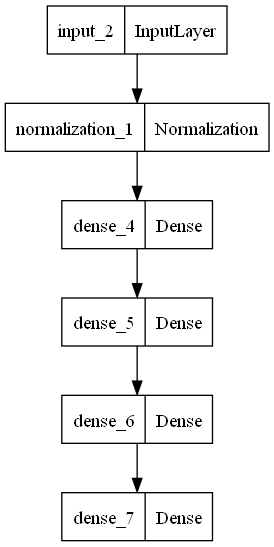

In [2]:
from tensorflow import keras

model2 = keras.models.Sequential()
model2.add(keras.Input(shape=(17,)))
# model2.add(keras.layers.Permute((2,1), input_shape=(17,)))
# model2.add(keras.layers.Flatten())
model2.add(keras.layers.Normalization(axis=-1))
model2.add(keras.layers.Dense(17, activation="relu"))
model2.add(keras.layers.Dense(52, activation="relu"))
model2.add(keras.layers.Dense(80, activation="softmax"))
# model2.add(keras.layers.Reshape(target_shape=(1,80)))
# model2.add(keras.layers.Permute((2,1), input_shape=(80,1)))
# model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(80))
# model2.add(keras.layers.Normalization(axis=-1)
print(model2.input_shape, model2.output_shape)

model2.compile(
      optimizer=keras.optimizers.Adam(1e-2),
      loss=keras.losses.CategoricalCrossentropy(from_logits=False),
      metrics=[keras.metrics.CategoricalCrossentropy()]
)

model2.summary()

keras.utils.plot_model(model2, "first_model.png")

In [86]:
model2.fit(dataset)

ValueError: in user code:

    File "d:\pessProjects\coolab_tensorflow_study\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "d:\pessProjects\coolab_tensorflow_study\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\pessProjects\coolab_tensorflow_study\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "d:\pessProjects\coolab_tensorflow_study\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "d:\pessProjects\coolab_tensorflow_study\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "d:\pessProjects\coolab_tensorflow_study\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "d:\pessProjects\coolab_tensorflow_study\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "d:\pessProjects\coolab_tensorflow_study\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "d:\pessProjects\coolab_tensorflow_study\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "d:\pessProjects\coolab_tensorflow_study\lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (80, 1) and (1, 80) are incompatible
